In [ ]:
#test-train split
def split_data(data,prob): #데이터 나누는 함수
    results=[],[]
    for row in data:
        results[0 if random.random()<prob else 1].append(row)
    return results

#train_test_split
def train_test_split(x,y,test_pct):
    data = zip(x,y) #데이터 묶기
    train, test = split_data(data,1-test_pct) #데이터 셋을 나눔
    x_train, y_train = zip(*train) # zip풀기
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

model = somekindofmodel()
x_train, x_test, y_train, y_test = train_test_split(xs,ys,0.33)
model.train(x_train, y_train)
performance=model.test(x_test,y_test)    

In [ ]:
#정확성 지표 코드

#1.정확도
def accuracy(tp,fp,fn,tn) :
    correct = tp+tn
    total = tp+fp+fn+tn
    return correct/total

#2. 정밀도
def precision(tp,fp,fn,tn):
    return tp/(tp+fp)

#3. 재현율
def recall(tp,fp,fn,tn):
    return tp/(tp+fn)

#4. F1 점수
def f1_score(tp,fp,fn,tn):
    p=precision(tp,fp,fn,tn)
    r=recall(tp,fp,fn,tn)
    return 2*p*r/(p+r)

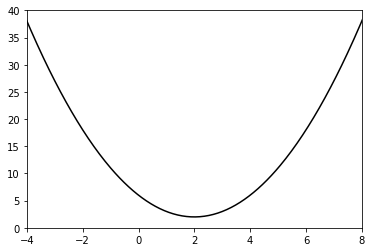

In [2]:
from matplotlib import pyplot as plt
import numpy as np

#1변수 함수 정의
def f1(x):
    return (x-2)**2+2

xx=np.linspace(-10,10,501) #(-10,10)범위에서 같은 간격으로 500개 뽑아 점 찍기
plt.plot(xx,f1(xx),'k') #k는 선으로 잇는 것, xx값에 x를 할당해서 f1 그래프 그리기
plt.xlim(-4,8) #x범위 (-4,8)범위
plt.ylim(0,40) #y범위 (0,40)범위
plt.show() #그래프 보여주기

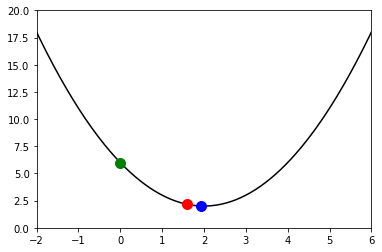

In [3]:
#f1을 미분한 함수 정의
def f1d(x):
    return 2*(x-2)

plt.plot(xx,f1(xx),'k')
alpha=0.4 #learning rate 설정
x=0 #초기값 설정
plt.plot(x,f1(x),'go',markersize=10) #go는 점을 찍으란 소리, 사이즈는 10

x=x-alpha*f1d(x) #gradient descent
plt.plot(x,f1(x),'go',markersize=10,color='r')#색깔은 red

x=x-alpha*f1d(x) #gradient descent
plt.plot(x,f1(x),'go',markersize=10,color='b')#색깔은 blue

plt.xlim(-2,6)
plt.ylim(0,20)
plt.show()

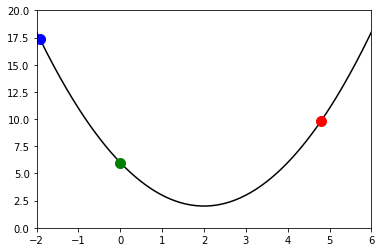

In [4]:
plt.plot(xx,f1(xx),'k')
alpha=1.2 #learning rate 설정
x=0 #초기값 설정
plt.plot(x,f1(x),'go',markersize=10) #go는 점을 찍으란 소리, 사이즈는 10

x=x-alpha*f1d(x) #gradient descent
plt.plot(x,f1(x),'go',markersize=10,color='r') #색깔은 red

x=x-alpha*f1d(x) #gradient descent
plt.plot(x,f1(x),'go',markersize=10,color='b') #색깔은 blue

plt.xlim(-2,6)
plt.ylim(0,20)
plt.show()

In [5]:
alpha=0.4
x=0

temp=x-alpha*f1d(x)

if (f1(temp)>f1(x)): #알파값이 너무 클 때 크다고 알려주는 메세지 나오게 하기
    print("learning rate is too large!")
else : 
    while(True):
        temp=x-alpha*f1d(x)
        if ((temp-x)<0.005): #temp와 x의 차이가 매우 얼마나지 않을 때까지 실행
            break
        x=temp
        
print(x,f1(x))

1.9968 2.00001024


In [6]:
from scipy import optimize as op #scipy모듈 불러오기
result=op.minimize(f1,1) #바로 결과를 알 수 있다.
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


<function matplotlib.pyplot.show>

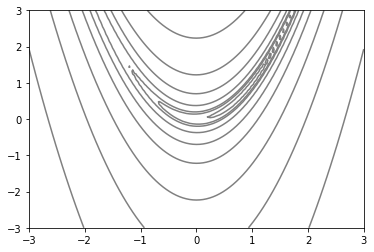

In [7]:
def f2(x,y):
    return (1-x)**2 +100*(y-x**2)**2

xx=np.linspace(-3,3,101)
yy=np.linspace(-3,3,101)
X,Y=np.meshgrid(xx,yy) #2차원함수 그리기 쉽도록 mershgrid이용(참조바람)
Z=f2(X,Y)

plt.contour(X,Y,Z,colors='gray',levels=[0.7,3,5,15,50,150,500,1500,5000]) #등고선 그리기
plt.show

[-4806 -1200]


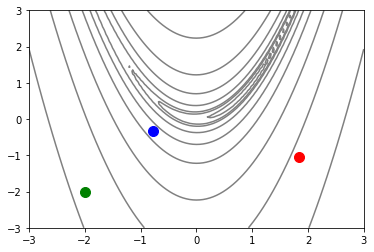

In [8]:
def f2d(x,y):
    return np.array([2*x-2-400*x*(y-x**2),200*(y-x**2)])
plt.contour(X,Y,Z,colors='gray',levels=[0.7,3,5,15,50,150,500,1500,5000])

alpha=8e-04
x=-2
y=-2
g=f2d(x,y)
print(g)

plt.plot(x,y,'go',markersize=10)

x=x-alpha*g[0]
y=y-alpha*g[1]
g=f2d(x,y)
plt.plot(x,y,'go',markersize=10,color='r')

x=x-alpha*g[0]
y=y-alpha*g[1]
g=f2d(x,y)
plt.plot(x,y,'go',markersize=10,color='b')

plt.show()

In [9]:
alpha=8e-04
x=-2
y=-2
g=f2d(x,y)

temp=(x-alpha*g[0],y-alpha*g[1])

if(f2(temp[0],temp[1])>f2(x,y)):
    print("learning rate is too large!")
else :
    while(True):
        g=f2d(x,y)
        temp=(x-alpha*g[0],y-alpha*g[1])
        if(f2(x,y)-f2(temp[0],temp[1])<0.00000000005):
            break
        x=temp[0]
        y=temp[1]
        
print(x,y,f2(x,y))

0.9997205483173297 0.9994400562865879 7.821833404464664e-08


In [10]:
def f3(x):
    return (1-x[0])**2 +100*(x[1]-x[0]**2)**2

result=op.minimize(f3,(2,2))
print(result)

      fun: 1.8932893809017893e-11
 hess_inv: array([[0.51675994, 1.03186494],
       [1.03186494, 2.0655726 ]])
      jac: array([ 5.27380711e-06, -2.50575298e-06])
  message: 'Optimization terminated successfully.'
     nfev: 140
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([0.99999565, 0.99999129])
